<a href="https://colab.research.google.com/github/Juliennnd/TP1_ML/blob/main/TP1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from keras.utils import to_categorical
from google.colab import files
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc



In [ ]:
files.upload ()

Saving stress_classification.csv to stress_classification.csv


{'stress_classification.csv': b'snoring_range;respiration_rate;body_temperature;limb_movement_rate;blood_oxygen_levels;rapid_eye_movement;hour_of_sleep;heart_rate;stress_level\r\n93.8;25.68;91.84;16.6;89.84;99.6;1.84;74.2;3\r\n91.64;25.104;91.552;15.88;89.552;98.88;1.552;72.76;3\r\n60;20;96;10;95;85;7;60;1\r\n85.76;23.536;90.768;13.92;88.768;96.92;0.768;68.84;3\r\n48.12;17.248;97.872;6.496;96.248;72.48;8.248;53.12;0\r\n56.88;19.376;95.376;9.376;94.064;83.44;6.376;58.44;1\r\n47;16.8;97.2;5.6;95.8;68;7.8;52;0\r\n50;18;99;8;97;80;9;55;0\r\n45.28;16.112;96.168;4.224;95.112;61.12;7.112;50.28;0\r\n55.52;19.104;95.104;9.104;93.656;82.76;6.104;57.76;1\r\n73.44;21.344;93.344;11.344;91.344;91.72;4.016;63.36;2\r\n59.28;19.856;95.856;9.856;94.784;84.64;6.856;59.64;1\r\n48.6;17.44;98.16;6.88;96.44;74.4;8.44;53.6;0\r\n96.288;26.288;85.36;17.144;82.432;100.36;0;75.72;4\r\n87.8;24.08;91.04;14.6;89.04;97.6;1.04;70.2;3\r\n52.32;18.464;94.464;8.464;92.696;81.16;5.464;56.16;1\r\n52.64;18.528;94.528;8.528;

In [ ]:
data = pd.read_csv("stress_classification.csv", sep=';')

In [ ]:
data.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
data.isnull().sum()

snoring_range          0
respiration_rate       0
body_temperature       0
limb_movement_rate     0
blood_oxygen_levels    0
rapid_eye_movement     0
hour_of_sleep          0
heart_rate             0
stress_level           0
dtype: int64

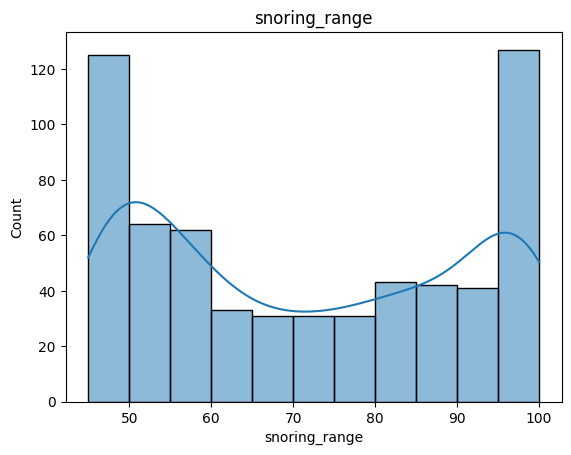

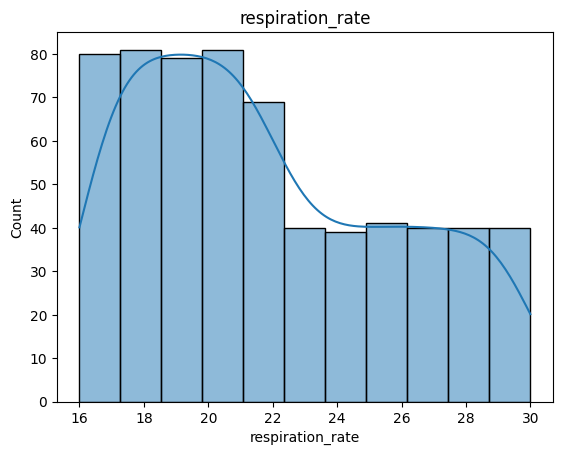

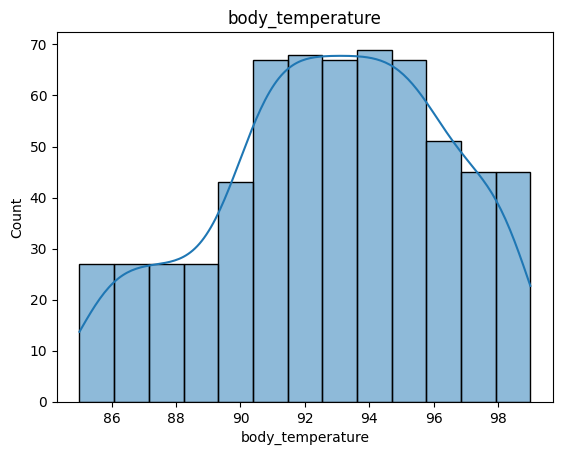

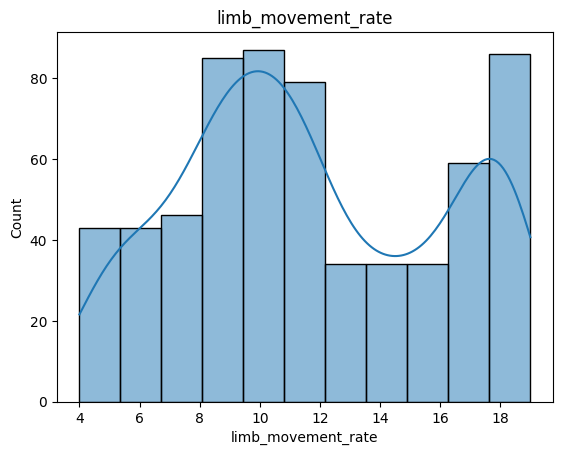

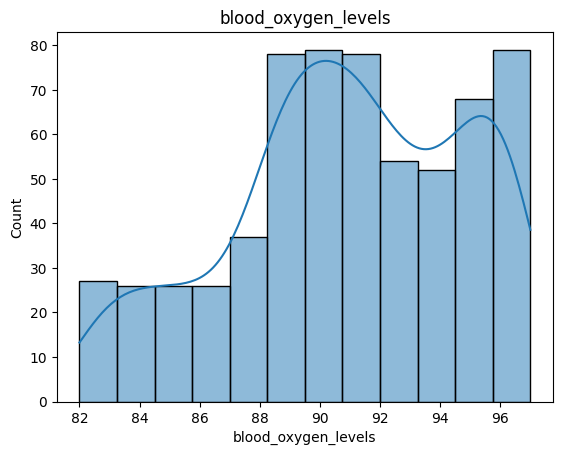

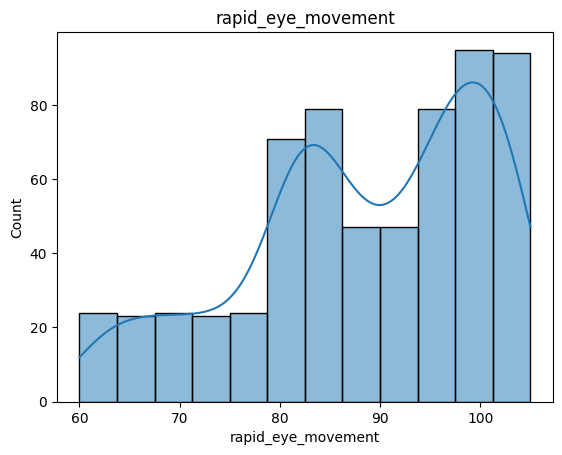

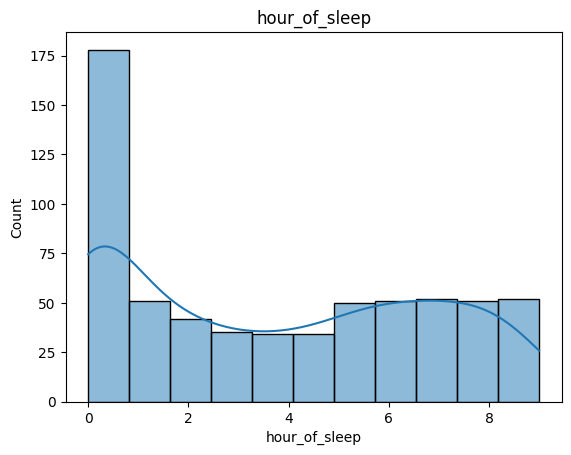

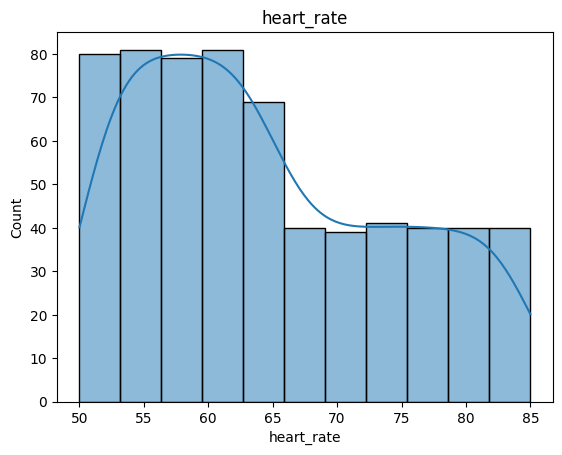

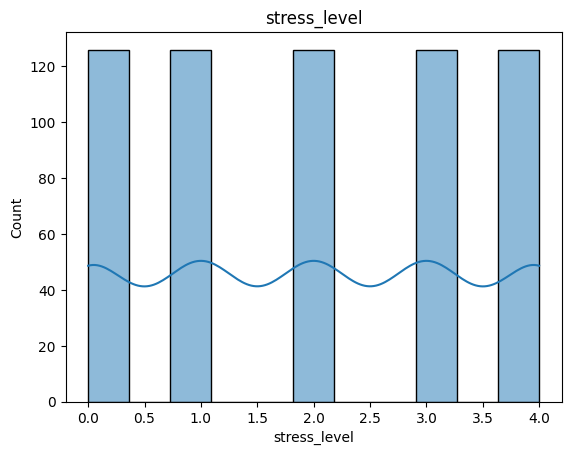

In [ ]:
# Plot histograms and density plots for each feature
for feature in data.columns:
    plt.figure()
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(feature)

plt.show()

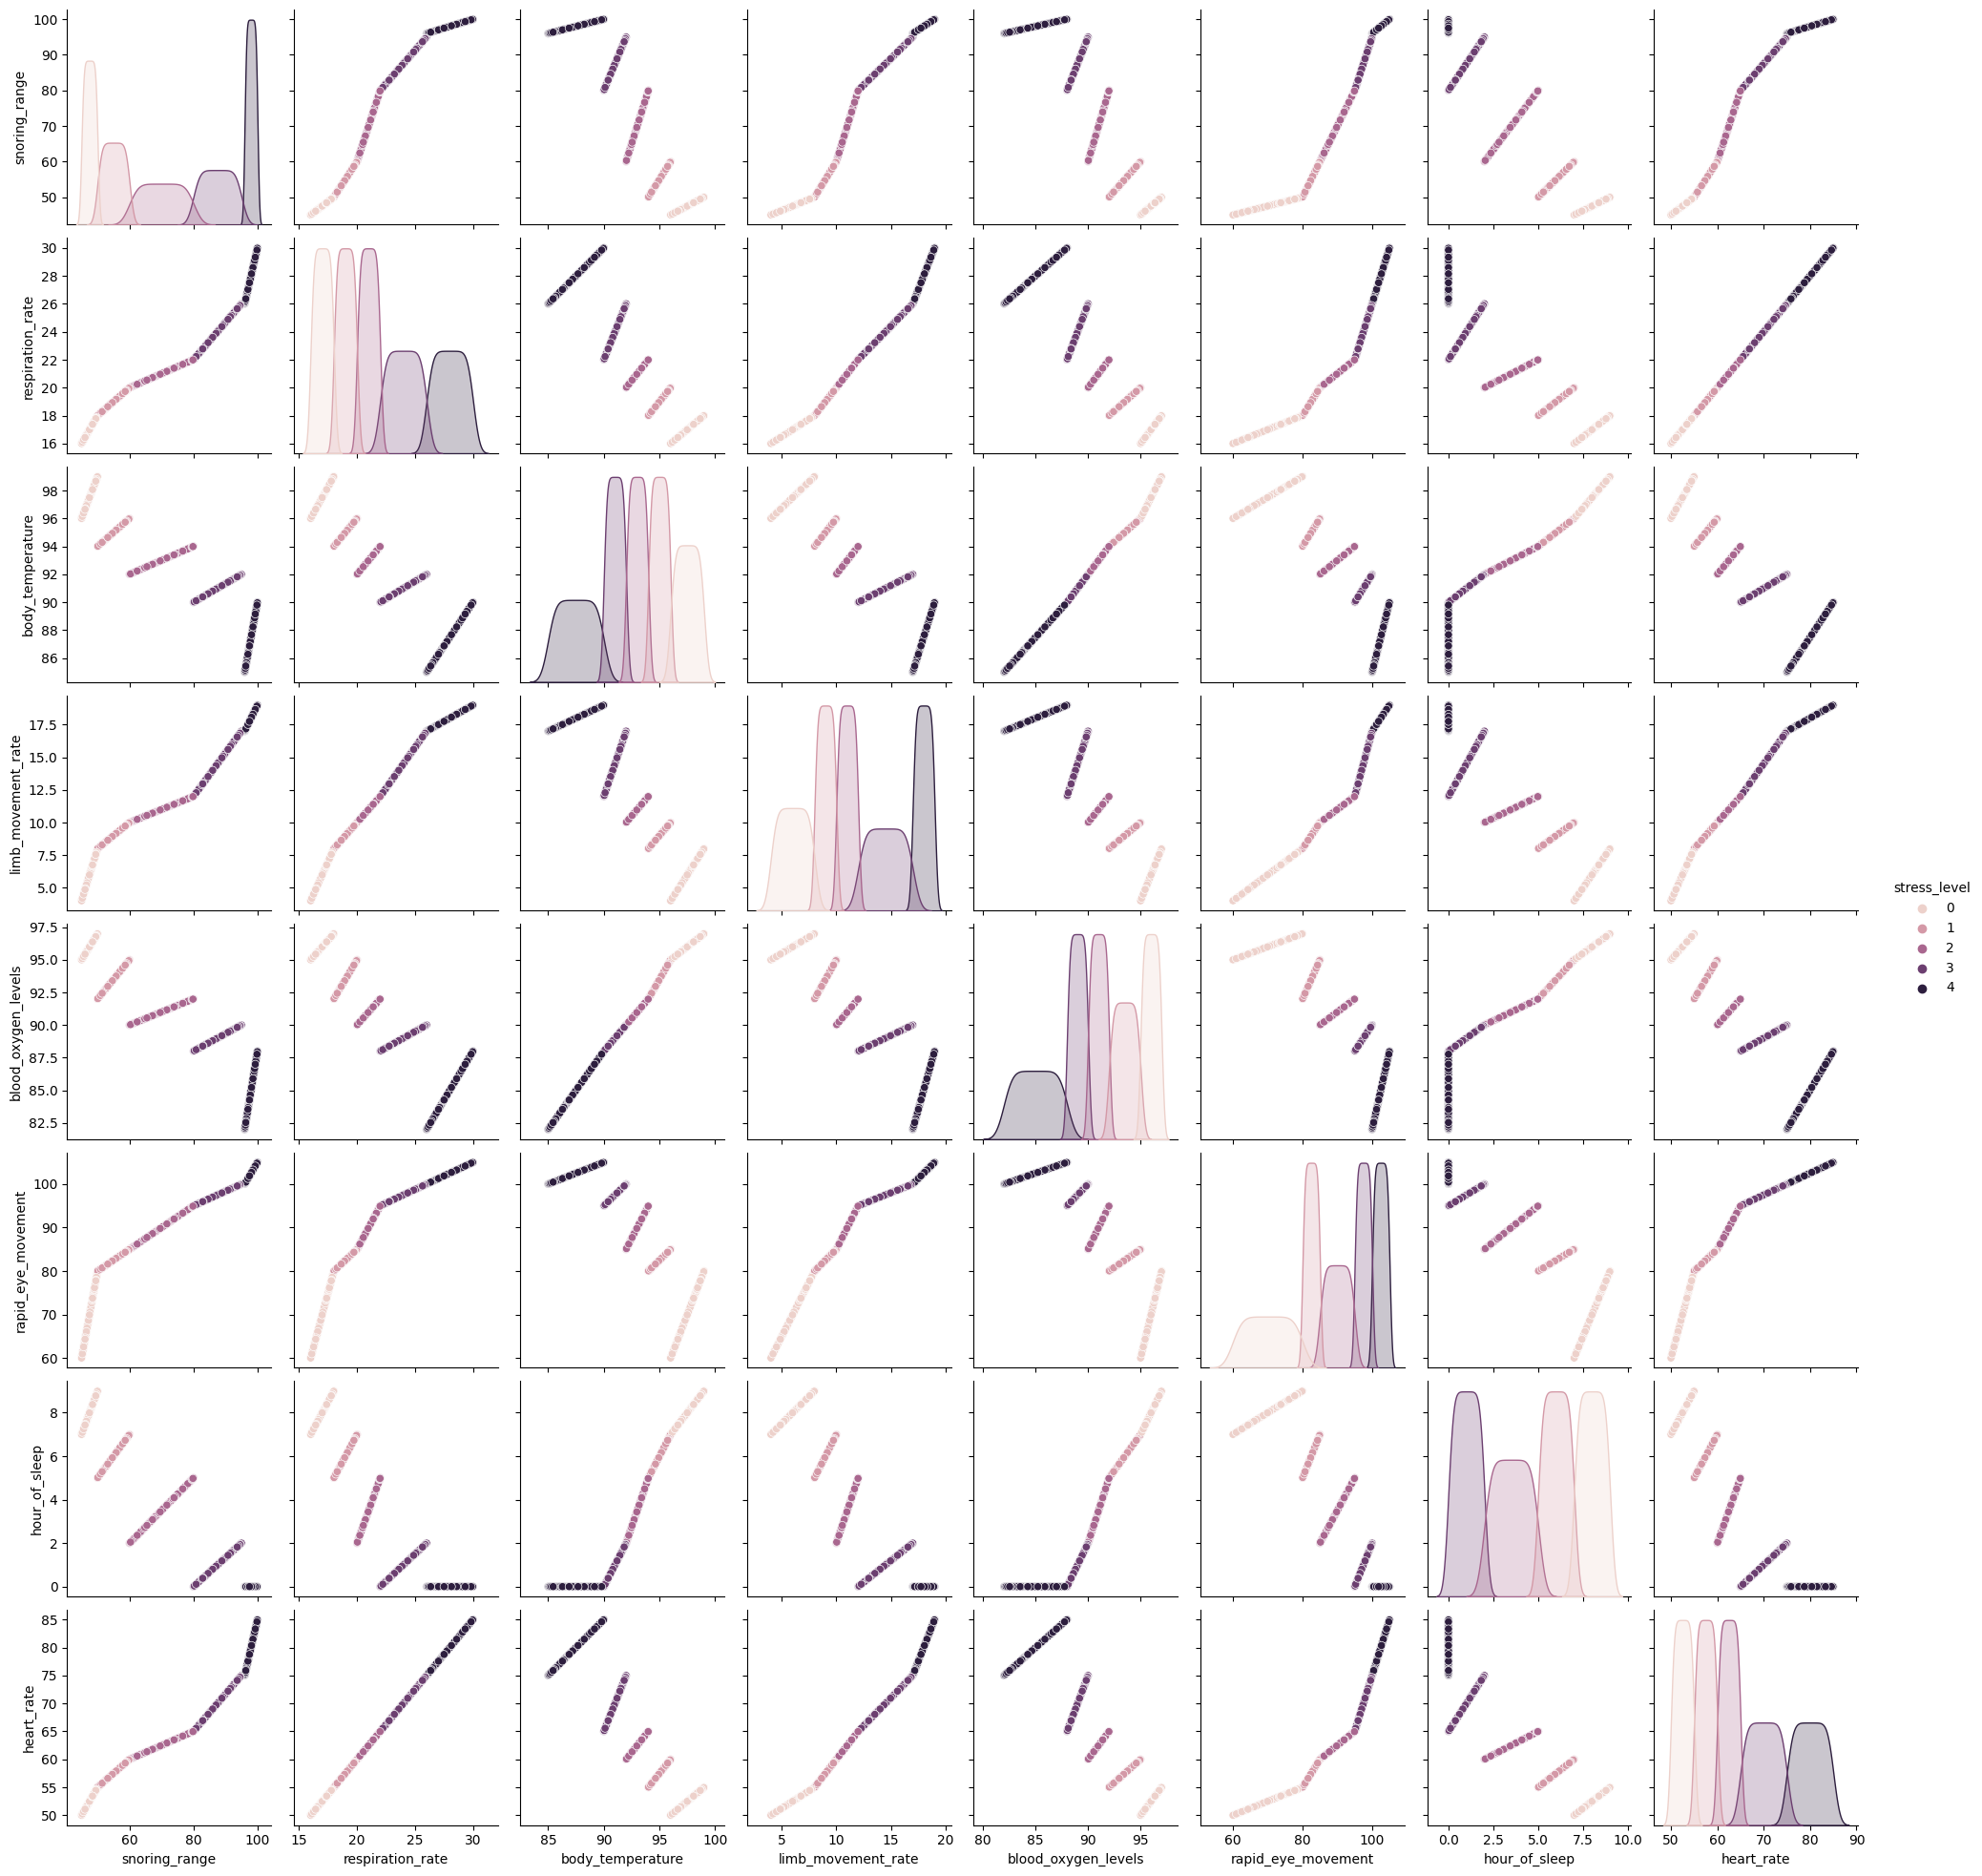

In [ ]:
sns.pairplot(data, hue='stress_level')

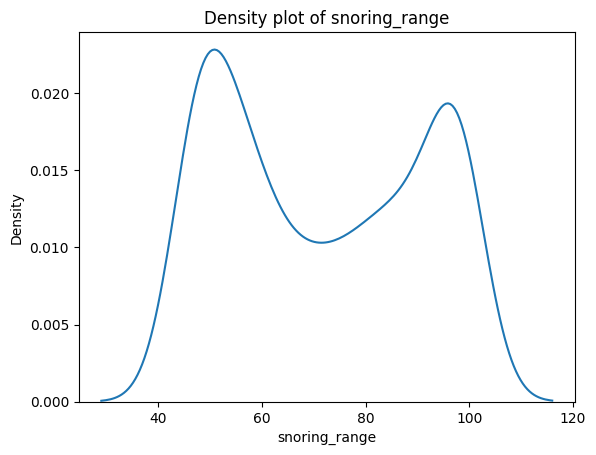

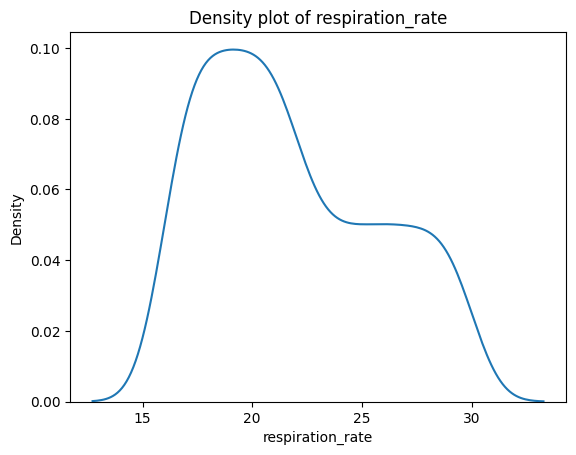

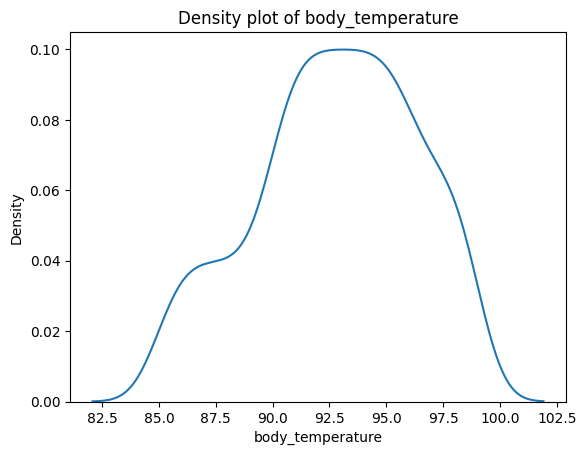

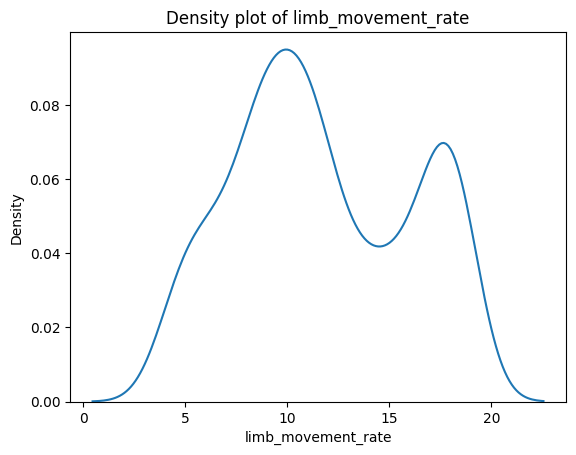

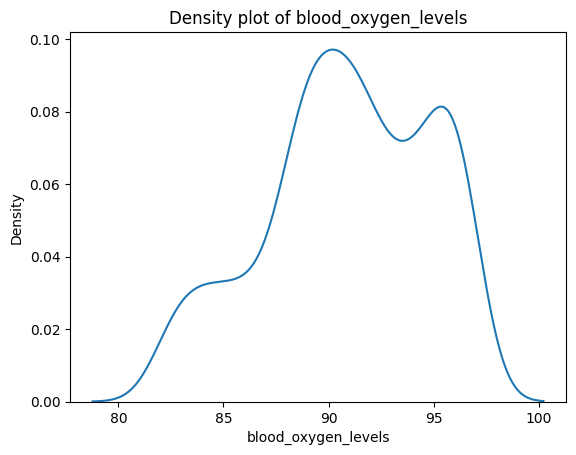

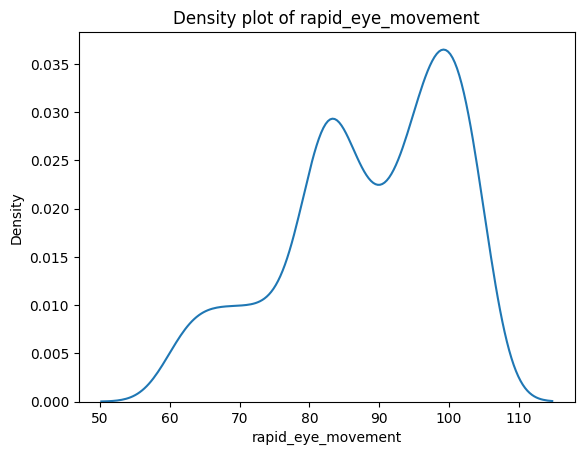

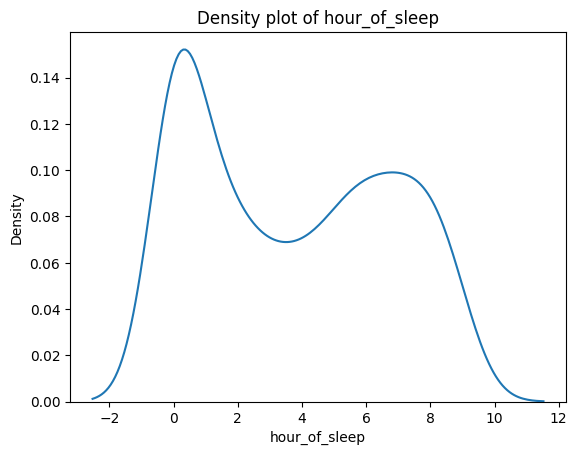

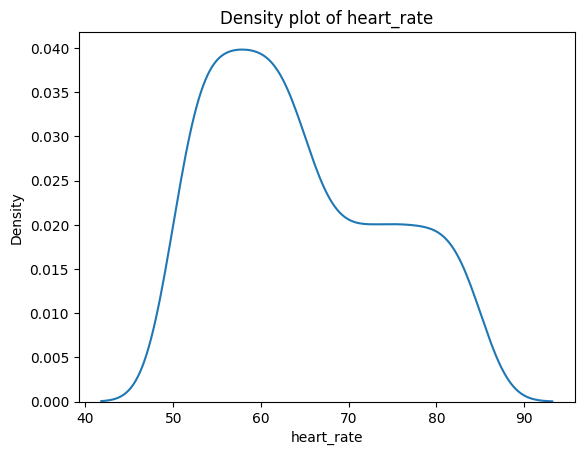

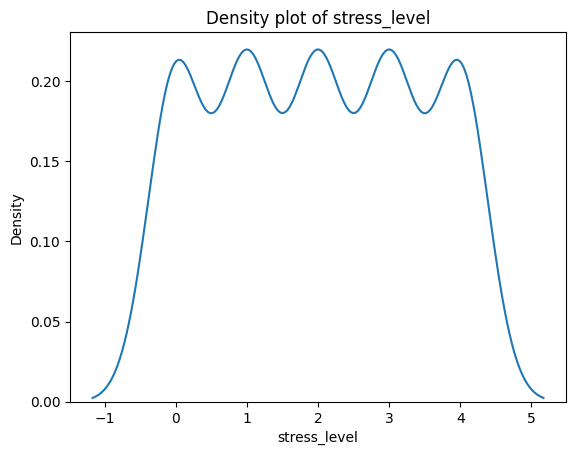

In [ ]:
# Create density plots for each feature
for feature in data.columns:
    sns.kdeplot(data=data[feature])
    plt.title(f'Density plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

<Axes: >

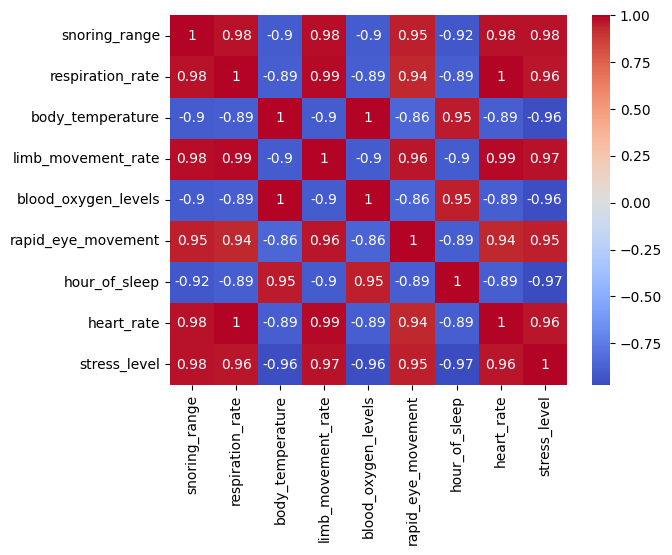

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap of the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

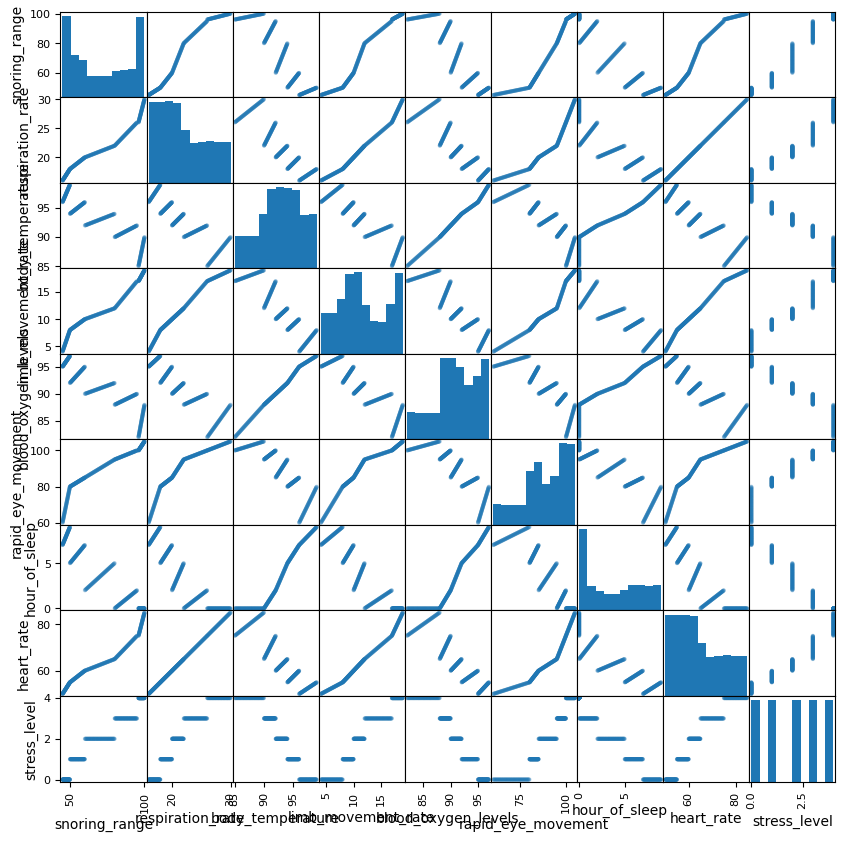

In [ ]:
#other type of correlation vizualisation
# Create a scatter plot matrix
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(10,10), diagonal='hist')
plt.show()

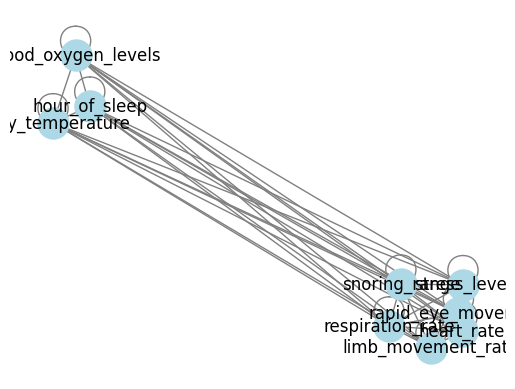

In [ ]:
#Other visualization 
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a graph from the correlation matrix
G = nx.from_pandas_adjacency(corr_matrix)

# Set the node labels to the feature names
node_labels = dict(zip(range(len(data.columns)), data.columns))
G = nx.relabel_nodes(G, node_labels)

# Create the correlation network plot
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
plt.axis('off')
plt.show()

In [ ]:
# Split the data into training and testing datasets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


print(f'Training dataset size: {len(train_data)}')
print(f'Testing dataset size: {len(test_data)}')

Training dataset size: 504
Testing dataset size: 126


In [ ]:
# Separate the target variable from the features
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# Scale the features using min-max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Try different values of k and evaluate the performance using cross-validation
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Choose the best value of k based on the validation scores
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Best value of k: {best_k}')

# Fit the model on the training dataset using the best value of k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Best value of k: 1


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predict the probabilities for each class using the test dataset
y_pred_prob = knn.predict_proba(X_test)

# Get the predicted labels by finding the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate the various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'ROC-AUC score: {roc_auc:.3f}')


Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000
ROC-AUC score: 1.000


<Axes: >

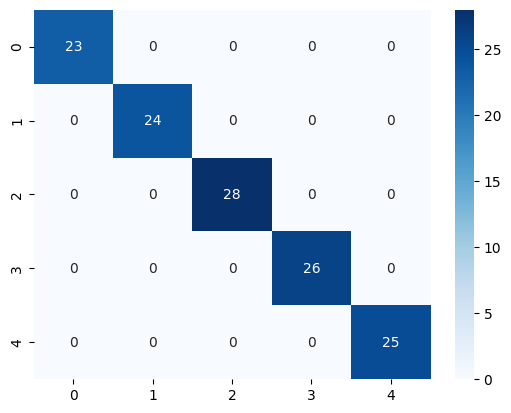

In [ ]:
# Get the predicted labels
y_pred = knn.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

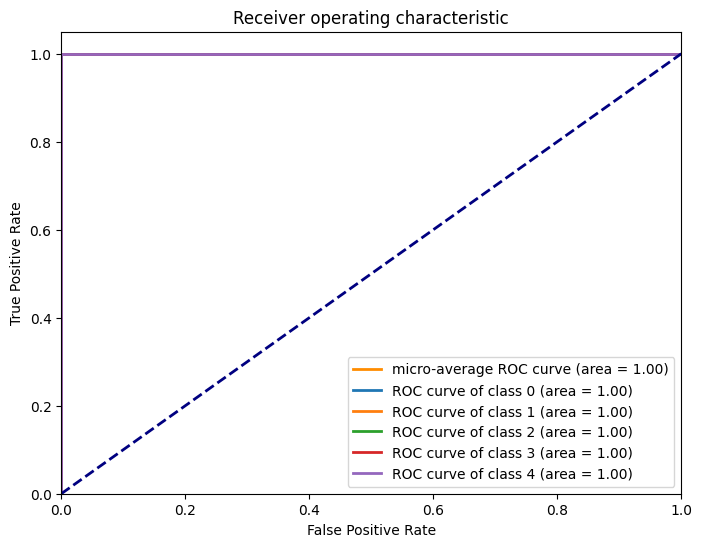

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y))

y_test_onehot = to_categorical(y_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

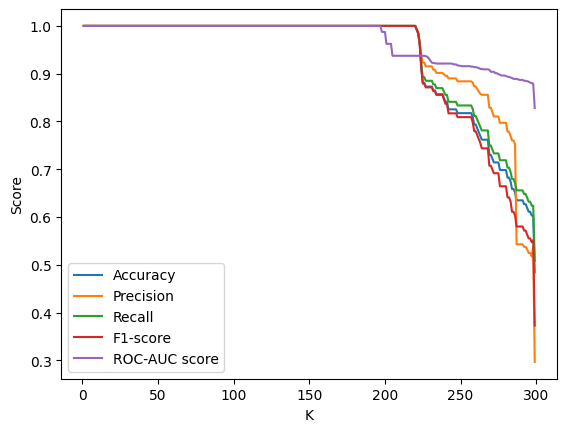

In [ ]:
# Test different value of K and plot its metrics 
 
k_values = range(1, 300)

# Initialize lists to store the performance metrics for each K value
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Loop through each K value and calculate the performance metrics using cross-validation
for k in k_values:
    # Initialize a KNN model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model and make predictions on the test set
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)
    
    # Calculate the different performance metrics and store them in the lists
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_prob, multi_class='ovo'))
    
# Plot the different performance metrics against the K values
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, f1_scores, label='F1-score')
plt.plot(k_values, roc_auc_scores, label='ROC-AUC score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

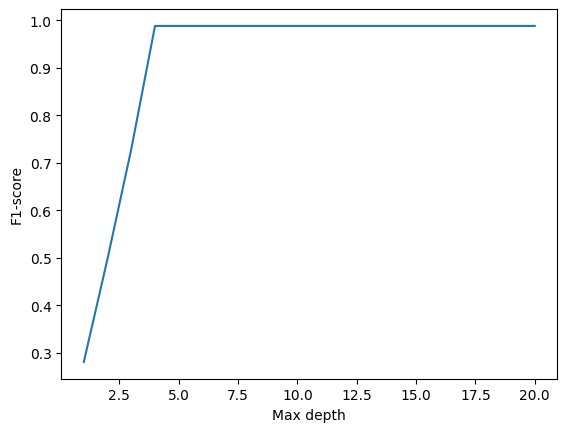

Best max_depth: 4
Accuracy: 0.976
Precision: 0.978
Recall: 0.976
F1-score: 0.976
ROC-AUC score: 0.985


In [ ]:
# DECISION TREE

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different values of max_depth and evaluate the performance using cross-validation
depth_values = range(1, 21)
f1_scores = []

for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='f1_macro')
    f1_scores.append(scores.mean())

# Plot the F1-score for each value of max_depth
plt.plot(depth_values, f1_scores)
plt.xlabel('Max depth')
plt.ylabel('F1-score')
plt.show()

# Choose the value of max_depth that gives the best performance on the validation set
best_depth = depth_values[np.argmax(f1_scores)]
print(f'Best max_depth: {best_depth}')

# Fit the model on the training dataset
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree.fit(X_train, y_train)

# Evaluate the performance on the validation dataset
accuracy_tree = accuracy_score(y_val, y_val_pred)
precision_tree = precision_score(y_val, y_val_pred, average='macro')
recall_tree = recall_score(y_val, y_val_pred, average='macro')
f1_tree = f1_score(y_val, y_val_pred, average='macro')
roc_auc_tree = roc_auc_score(y_val, tree.predict_proba(X_val), multi_class='ovo')



print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'ROC-AUC score: {roc_auc:.3f}')


**We can observe that all the metrics are better with the KNN algorithm for this dataset in particular as the graphs below can show **

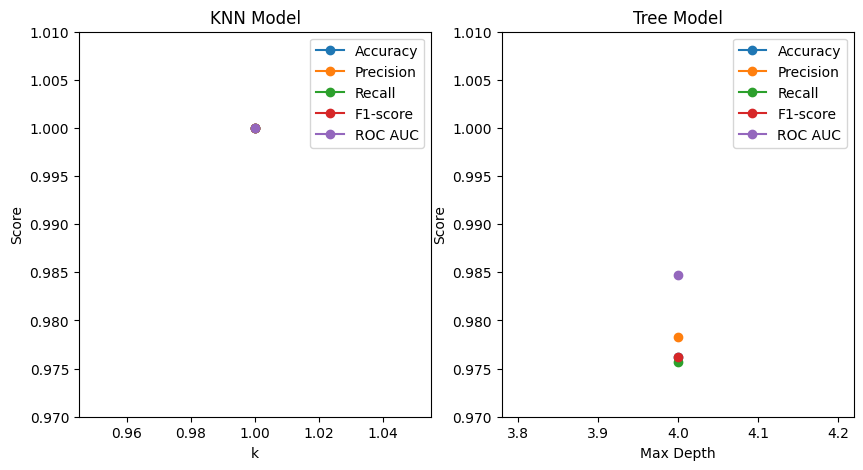

In [ ]:
k_values=1
max_depths = 4
# Define the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
knn_scores = [accuracy, precision, recall, f1, roc_auc]
tree_scores = [accuracy_tree, precision_tree, recall_tree, f1_tree, roc_auc_tree]
#print (tree_scores)
#print (knn_scores)

# Plotting accuracy, precision, recall, f1-score and ROC AUC
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs = axs.flatten()

# KNN Model
axs[0].plot(k_values, accuracy, '-o', label='Accuracy')
axs[0].plot(k_values, precision, '-o', label='Precision')
axs[0].plot(k_values, recall, '-o', label='Recall')
axs[0].plot(k_values, f1, '-o', label='F1-score')
axs[0].plot(k_values, roc_auc, '-o', label='ROC AUC')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Score')
axs[0].set_title('KNN Model')
axs[0].legend()
axs[0].set_ylim([0.970, 1.01])

# Tree Model
axs[1].plot(max_depths, accuracy_tree, '-o', label='Accuracy')
axs[1].plot(max_depths, precision_tree, '-o', label='Precision')
axs[1].plot(max_depths, recall_tree, '-o', label='Recall')
axs[1].plot(max_depths, f1_tree, '-o', label='F1-score')
axs[1].plot(max_depths, roc_auc_tree, '-o', label='ROC AUC')
axs[1].set_xlabel('Max Depth')
axs[1].set_ylabel('Score')
axs[1].set_title('Tree Model')
axs[1].legend()
axs[1].set_ylim([0.970, 1.01])

plt.show()


Saving stress_classification.csv to stress_classification (3).csv


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model                  Accuracy    Precision    Recall    F1 Score
-------------------  ----------  -----------  --------  ----------
KNN                    1            1         1           1
Decision Tree          0.97619      0.977579  0.97619     0.976126
Logistic Regression    1            1         1           1
Random Forest          0.992063     0.992337  0.992063    0.992055


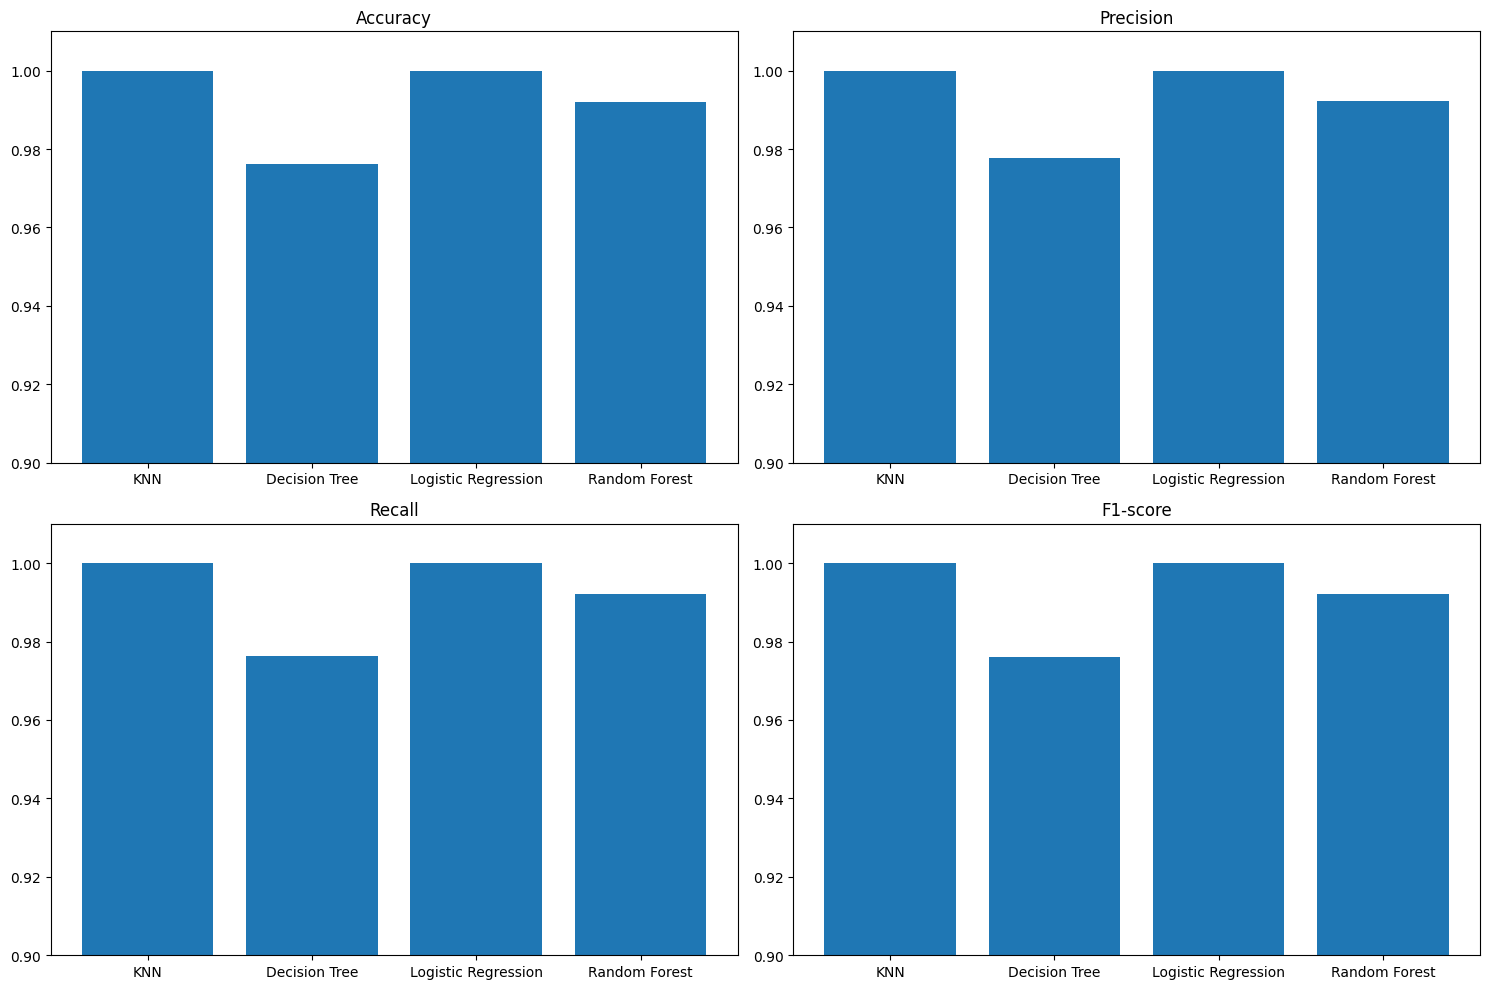

In [ ]:
#TO GO FURTHER

from tabulate import tabulate

#load the data (redoing everything to just run 1st cell and this one)
#files.upload ()
#data = pd.read_csv("stress_classification.csv", sep=';')

# split data into features and target
X = data.drop(['stress_level'], axis=1)
y = data['stress_level']

# Scale the features using min-max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# split data into train and test sets (20% of test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the models
knn = KNeighborsClassifier(n_neighbors=1)
tree = DecisionTreeClassifier(max_depth=4)
logistic = LogisticRegression()
forest = RandomForestClassifier(n_estimators=100, max_depth=4)

# train the models
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
logistic.fit(X_train, y_train)
forest.fit(X_train, y_train)

# predict on the test set
knn_y_pred = knn.predict(X_test)
tree_y_pred = tree.predict(X_test)
logistic_y_pred = logistic.predict(X_test)
forest_y_pred = forest.predict(X_test)


# calculate evaluation metrics for each model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
tree_accuracy = accuracy_score(y_test, tree_y_pred)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
forest_accuracy = accuracy_score(y_test, forest_y_pred)

knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
tree_precision = precision_score(y_test, tree_y_pred, average='weighted')
logistic_precision = precision_score(y_test, logistic_y_pred, average='weighted')
forest_precision = precision_score(y_test, forest_y_pred, average='weighted')

knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
tree_recall = recall_score(y_test, tree_y_pred, average='weighted')
logistic_recall = recall_score(y_test, logistic_y_pred, average='weighted')
forest_recall = recall_score(y_test, forest_y_pred, average='weighted')

knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
tree_f1 = f1_score(y_test, tree_y_pred, average='weighted')
logistic_f1 = f1_score(y_test, logistic_y_pred, average='weighted')
forest_f1 = f1_score(y_test, forest_y_pred, average='weighted')

#knn_roc_auc = roc_auc_score(y_test, knn_y_pred, multi_class='ovr', average='weighted')
#tree_roc_auc = roc_auc_score(y_test, tree_y_pred, multi_class='ovr', average='weighted')
#logistic_roc_auc = roc_auc_score(y_test, logistic_y_pred, multi_class='ovr', average='weighted')
#forest_roc_auc = roc_auc_score(y_test, forest_y_pred, multi_class='ovr', average='weighted')

# plot results
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']
accuracy = [knn_accuracy, tree_accuracy, logistic_accuracy, forest_accuracy]
precision = [knn_precision, tree_precision, logistic_precision, forest_precision]
recall = [knn_recall, tree_recall, logistic_recall, forest_recall]
f1 = [knn_f1, tree_f1, logistic_f1, forest_f1]
#roc_auc = [knn_roc_auc, tree_roc_auc, logistic_roc_auc, forest_roc_auc]

#print to see each value
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
table = zip(models, accuracy, precision, recall, f1)
print(tabulate(table, headers=headers))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axs = axs.flatten()

# plot accuracy
axs[0].bar(models, accuracy)
axs[0].set_title('Accuracy')
axs[0].set_ylim([0.9, 1.01])

# plot precision
axs[1].bar(models, precision)
axs[1].set_title('Precision')
axs[1].set_ylim([0.9, 1.01])

# plot recall
axs[2].bar(models, recall)
axs[2].set_title('Recall')
axs[2].set_ylim([0.9, 1.01])

# plot f1-score
axs[3].bar(models, f1)
axs[3].set_title('F1-score')
axs[3].set_ylim([0.9, 1.01])

# plot roc-auc
#axs[4].bar(models, roc_auc)
#axs[4].set_title('ROC AUC')
#axs[4].set_ylim([0.6, 1.01])

plt.tight_layout()
plt.show()
